In [1]:
import pandas as pd
pd.set_option("display.max_columns",999) # display all columns

from pymatgen.analysis.local_env import BrunnerNN_reciprocal, BrunnerNN_relative, BrunnerNN_real, EconNN, JMolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, VoronoiNN_modified, CrystalNN
from materialscoord.core import Benchmark, HumanInterpreter, NbFuncs

methods = [BrunnerNN_reciprocal(), BrunnerNN_relative(), BrunnerNN_real(), 
           EconNN(), JMolNN(), MinimumDistanceNN(), MinimumOKeeffeNN(),
           VoronoiNN(), VoronoiNN_modified(), CrystalNN(), HumanInterpreter()]
structure_groups = ["A2BX4", "ABX3", "ABX4", "common_binaries", "laves", "mixed", "zeolites"]

bm = Benchmark(methods=methods, structure_groups=structure_groups, unique_sites=True,
               use_weights=False, cation_anion=False, anion_cation=True)
bm.benchmark()

/Users/hillarypan/AJResearch/cn_routines/codes/pymatgen/pymatgen/__init__.py:87: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


Initialization successful.


In [2]:
report = bm.report(totals=False, separate_columns=True)
report

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real10,BrunnerNN_real11,BrunnerNN_real12,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_real4,BrunnerNN_real5,BrunnerNN_real6,BrunnerNN_real7,BrunnerNN_real8,BrunnerNN_real9,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal10,BrunnerNN_reciprocal11,BrunnerNN_reciprocal12,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_reciprocal4,BrunnerNN_reciprocal5,BrunnerNN_reciprocal6,BrunnerNN_reciprocal7,BrunnerNN_reciprocal8,BrunnerNN_reciprocal9,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative10,BrunnerNN_relative11,BrunnerNN_relative12,BrunnerNN_relative2,BrunnerNN_relative3,BrunnerNN_relative4,BrunnerNN_relative5,BrunnerNN_relative6,BrunnerNN_relative7,BrunnerNN_relative8,BrunnerNN_relative9,CrystalNN0,CrystalNN1,CrystalNN10,CrystalNN11,CrystalNN12,CrystalNN2,CrystalNN3,CrystalNN4,CrystalNN5,CrystalNN6,CrystalNN7,CrystalNN8,CrystalNN9,EconNN0,EconNN1,EconNN10,EconNN11,EconNN12,EconNN2,EconNN3,EconNN4,EconNN5,EconNN6,EconNN7,EconNN8,EconNN9,HumanInterpreter0,HumanInterpreter1,HumanInterpreter10,HumanInterpreter11,HumanInterpreter12,HumanInterpreter2,HumanInterpreter3,HumanInterpreter4,HumanInterpreter5,HumanInterpreter6,HumanInterpreter7,HumanInterpreter8,HumanInterpreter9,JMolNN0,JMolNN1,JMolNN10,JMolNN11,JMolNN12,JMolNN2,JMolNN3,JMolNN4,JMolNN5,JMolNN6,JMolNN7,JMolNN8,JMolNN9,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN10,MinimumDistanceNN11,MinimumDistanceNN12,MinimumDistanceNN2,MinimumDistanceNN3,MinimumDistanceNN4,MinimumDistanceNN5,MinimumDistanceNN6,MinimumDistanceNN7,MinimumDistanceNN8,MinimumDistanceNN9,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN10,MinimumOKeeffeNN11,MinimumOKeeffeNN12,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumOKeeffeNN4,MinimumOKeeffeNN5,MinimumOKeeffeNN6,MinimumOKeeffeNN7,MinimumOKeeffeNN8,MinimumOKeeffeNN9,VoronoiNN0,VoronoiNN1,VoronoiNN10,VoronoiNN11,VoronoiNN12,VoronoiNN2,VoronoiNN3,VoronoiNN4,VoronoiNN5,VoronoiNN6,VoronoiNN7,VoronoiNN8,VoronoiNN9,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified10,VoronoiNN_modified11,VoronoiNN_modified12,VoronoiNN_modified2,VoronoiNN_modified3,VoronoiNN_modified4,VoronoiNN_modified5,VoronoiNN_modified6,VoronoiNN_modified7,VoronoiNN_modified8,VoronoiNN_modified9
Al2O3_corundum_9770,{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 8.0},{},{},{},{},{},{},{},{},{},{},{},{},{u'Al': 4.0},{},{},{},{},{},{},{},{},{},{},{},{}
AlAsO4_33254,"{u'As': 1.0, u'Al': 1.0}","{u'As': 8.0, u'Al': 6.0}",{},{},{},{},{},{},{},{},{},{},{},"{u'As': 1.0, u'Al': 1.0}","{u'As': 1.0, u'Al': 1.0}",{},{},{},{},{},{},{},{},{},{},{},"{u'As': 1.0, u'Al': 1.0}","{u'As': 8.0, u'Al': 6.0}",{},{},{},{},{},{},{},{},{},{},{},"{u'As': 1.0, u'Al': 1.0}","{u'As': 1.0, u'Al': 1.0}",{},{},{},{},{},{},{},{},{},{},{},"{u'As': 1.0, u'Al': 1.0}","{u'As': 1.0, u'Al': 1.0}",{},{},{},{},{},{},{},{},{},{},{},"{u'As': 1.0, u'Al': 1.0}","{u'As': 1.0, u'Al': 2.0}",{},{},{},{},{},{},{},{},{},{},{},"{u'As': 1.0, u'Al': 1.0}","{u'As': 1.0, u'Al': 1.0}",{},{},{},{},{},{},{},{},{},{},{},"{u'As': 1.0, u'Al': 1.0}","{u'As': 1.0, u'Al': 1.0}",{},{},{},{},{},{},{},{},{},{},{},{u'As': 1.0},{u'As': 1.0},{},{},{},{},{},{},{},{},{},{},{},"{u'As': 3.0, u'Al': 2.0}","{u'As': 2.0, u'Al': 3.0}",{},{},{},{},{},{},{},{},{},{},{},"{u'As': 1.0, u'Al': 1.0}","{u'As': 1.0, u'Al': 1.0}",{},{},{},{},{},{},{},{},{},{},{}
AlPO4_91671,"{u'P': 4.0, u'Al': 4.0}","{u'P': 5.0, u'Al': 5.0}",{},{},{},"{u'P': 7.0, u'Al': 7.0}","{u'P': 4.0, u'Al': 4.0}",{},{},{},{},{},{},"{u'P': 1.0, u'Al': 1.0}","{u'P': 1.0, u'Al': 1.0}",{},{},{},"{u'P': 1.0, u'Al': 1.0}","{u'P': 1.0,

In [3]:
nbf = NbFuncs(bm)
df = nbf.final()
df

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,VoronoiNN,VoronoiNN_modified
Al2O3_corundum_9770,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00
AlAsO4_33254,2.00,0.50,2.00,0.50,0.50,0.50,0.50,1.50,1.50,0.50
AlPO4_91671,1.75,0.00,1.75,0.00,0.00,0.00,0.25,0.25,0.25,0.00
BAsO4_highcristobalite_26891,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
BaAl2O4_21080,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.75,0.00
BaTiO3_67520,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.33,0.00,0.00
BaZnF4_182604,0.25,1.50,0.25,0.25,0.25,1.50,1.50,0.25,0.25,0.25
Be2SiO4_phenakite_64942,1.75,0.00,1.75,0.00,0.00,0.00,0.00,0.00,1.00,0.00
Ca2MgSi2O7_melilite_50065,0.00,1.14,0.00,0.00,1.14,1.14,1.14,1.14,0.57,0.00
Ca5V3O12F_apatite_172997,14.77,0.92,14.77,0.92,0.92,0.92,0.92,0.92,2.92,0.92


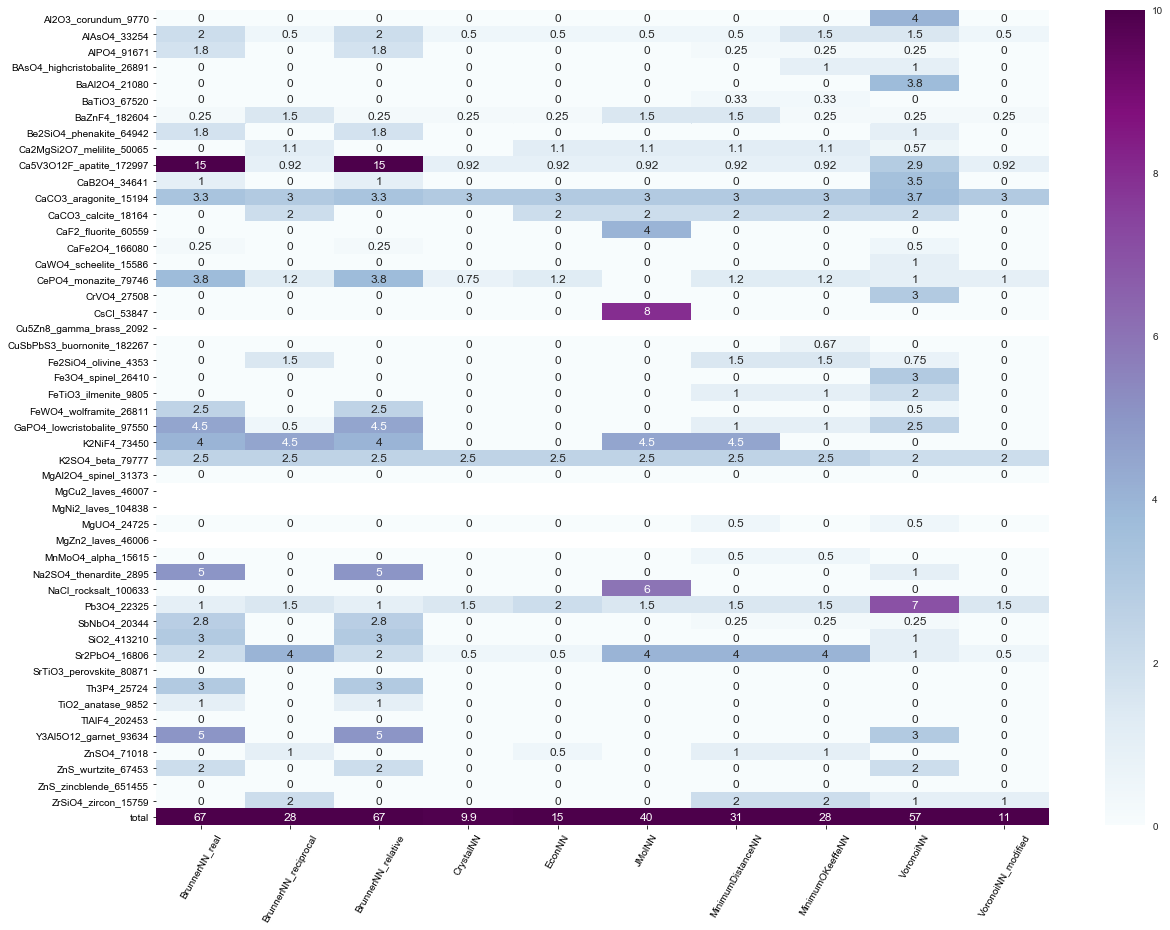

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 15))

sns.set(font='Times New Roman')
sns.set(font_scale=1)

hm = sns.heatmap(df, annot=True, cmap="BuPu", vmax=10)

ax.set_xticklabels(df.columns.tolist(), rotation=60)
ax.set_yticklabels(df.index.tolist())


plt.show()